*week 2 exercise - part 1*

# Basic Charts with Matplotlib

## Matplotlib

First, we import the required libraries, using standard conventions. We first import numpy for all our mathematical needs, then the matplotlib as plotting library and pyplot which gives an easy API to create plots with matplotlib. Later we will introduce Seaborn as well.

In [6]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline 

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

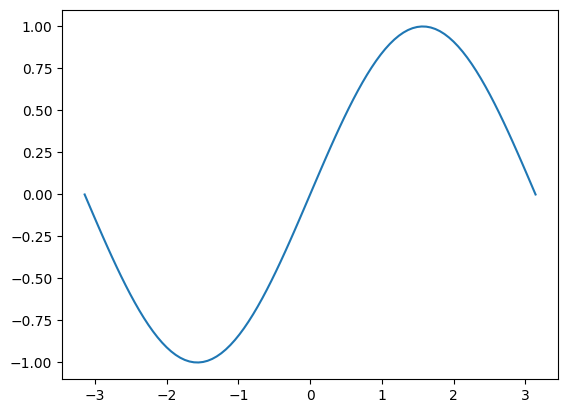

In [7]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X)  # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

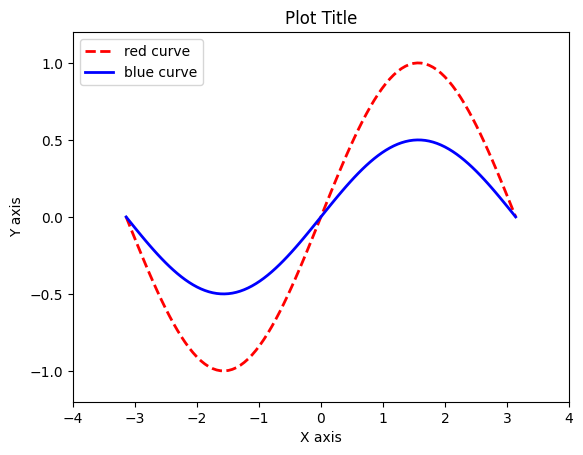

In [8]:
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve'], loc='best')

Go to the documentation pages of Matplotlib [http://matplotlib.org/contents.html](http://matplotlib.org/contents.html) to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

Another nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas
We will work with a database of information about cities around the world:

[https://dev.maxmind.com/geoip/geoip2/geolite2/](https://dev.maxmind.com/geoip/geoip2/geolite2/)

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Dataframes store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [9]:
import urllib.request as urllib, zipfile, os

url = 'https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [10]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [11]:
import pandas as pd
# reading files may cause problems or give errors... Can you explain the use of the encoding parameter?
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

## Data Manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

In [12]:
cities.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876.0,-20.333333,30.033333


In [13]:
cities.sort_values(by='Population', ascending=False).head(10)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803


By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment 1a
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

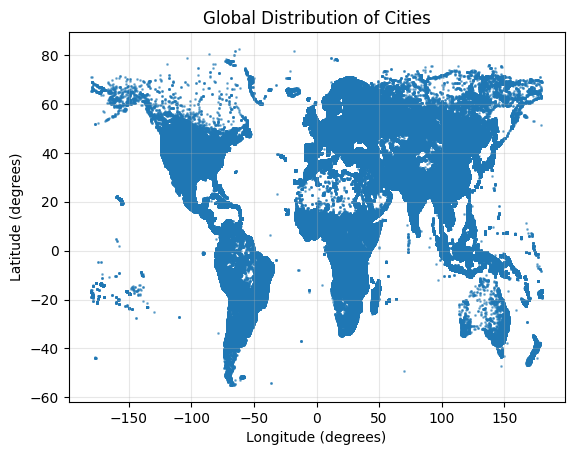

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

plt.figure();

# I'm plotting all cities worldwide using their latitude and longitude coordinates
plt.scatter(cities['Longitude'], cities['Latitude'], s=1, alpha=0.5)
# Adding labels so I know what each axis represents
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
# I want a clear title to explain what I'm showing
plt.title('Global Distribution of Cities')
# Adding a grid makes it easier to read the coordinates
plt.grid(True, alpha=0.3)
# From this plot I can see that cities aren't randomly distributed - they cluster together 
# in certain regions like Europe and Asia where there are more people

## Assignment 1b

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

(50.5, 54.0)

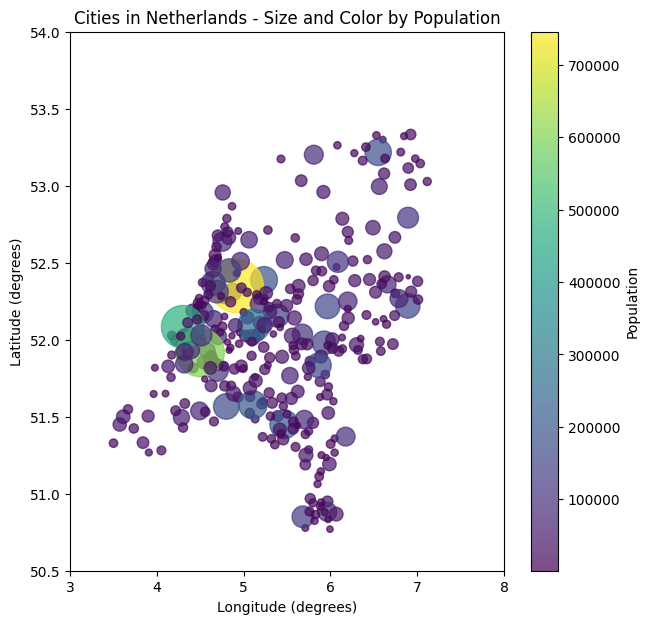

In [15]:
dutch_cities = cities[ cities['Country'] =='nl' ]
plt.figure(figsize=[7,7]);

# First I need to filter out cities that don't have population numbers
dutch_with_pop = dutch_cities.dropna(subset=['Population'])
# Now I'll make a scatter plot where bigger dots mean bigger cities
# I'm also using different colors to show population - darker = more people
scatter = plt.scatter(dutch_with_pop['Longitude'], dutch_with_pop['Latitude'], 
                     s=dutch_with_pop['Population']/500,  # Making size proportional to population
                     c=dutch_with_pop['Population'],      # Color also shows population
                     cmap='viridis', alpha=0.7)           # Using nice colors
# Labeling my axes properly
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.title('Cities in Netherlands - Size and Color by Population')
# I need a colorbar so people understand what the colors mean
plt.colorbar(scatter, label='Population')
# Setting limits to focus just on the Netherlands mainland
plt.xlim(3, 8)
plt.ylim(50.5, 54)
# Looking at this, I can clearly see which cities are biggest - the large dark circles
# are obviously Amsterdam, Rotterdam, and other major cities


## Assignment 1c

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function?

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

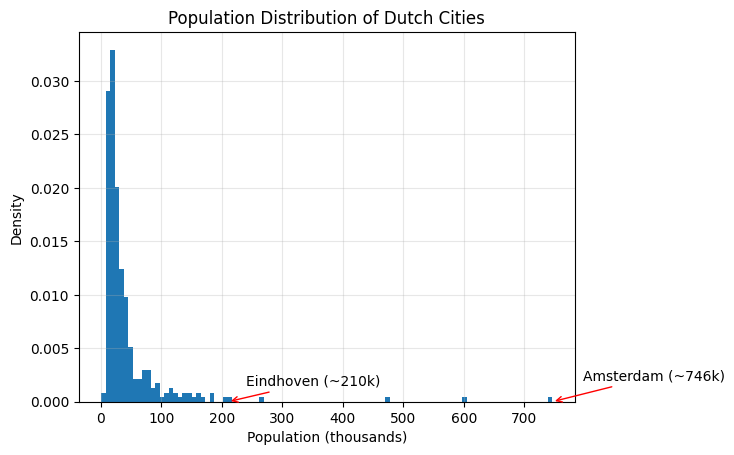

In [16]:
plt.figure();
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), 100, density=1);

# Making sure my axes are labeled clearly
plt.xlabel('Population (thousands)')
plt.ylabel('Density')
plt.title('Population Distribution of Dutch Cities')
# Grid helps me read the values better
plt.grid(True, alpha=0.3)

# I want to point out where Amsterdam and Eindhoven are on this histogram
amsterdam_pop = dutch_cities[dutch_cities['AccentCity'].str.contains('Amsterdam', na=False)]['Population'].max()
eindhoven_pop = dutch_cities[dutch_cities['AccentCity'].str.contains('Eindhoven', na=False)]['Population'].max()

# Adding arrows to show where these cities appear
if not pd.isna(amsterdam_pop):
    plt.annotate(f'Amsterdam (~{amsterdam_pop/1000:.0f}k)', 
                xy=(amsterdam_pop/1000, 0),
                xytext=(amsterdam_pop/1000 + 50, 0.002),
                arrowprops=dict(arrowstyle='->', color='red'))

if not pd.isna(eindhoven_pop):
    plt.annotate(f'Eindhoven (~{eindhoven_pop/1000:.0f}k)', 
                xy=(eindhoven_pop/1000, 0),
                xytext=(eindhoven_pop/1000 + 30, 0.0015),
                arrowprops=dict(arrowstyle='->', color='red'))

# The dropna() is important because without it I get errors from missing data
# This histogram shows me that most Dutch cities are pretty small, with just a few big ones

## Assignment 1d

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

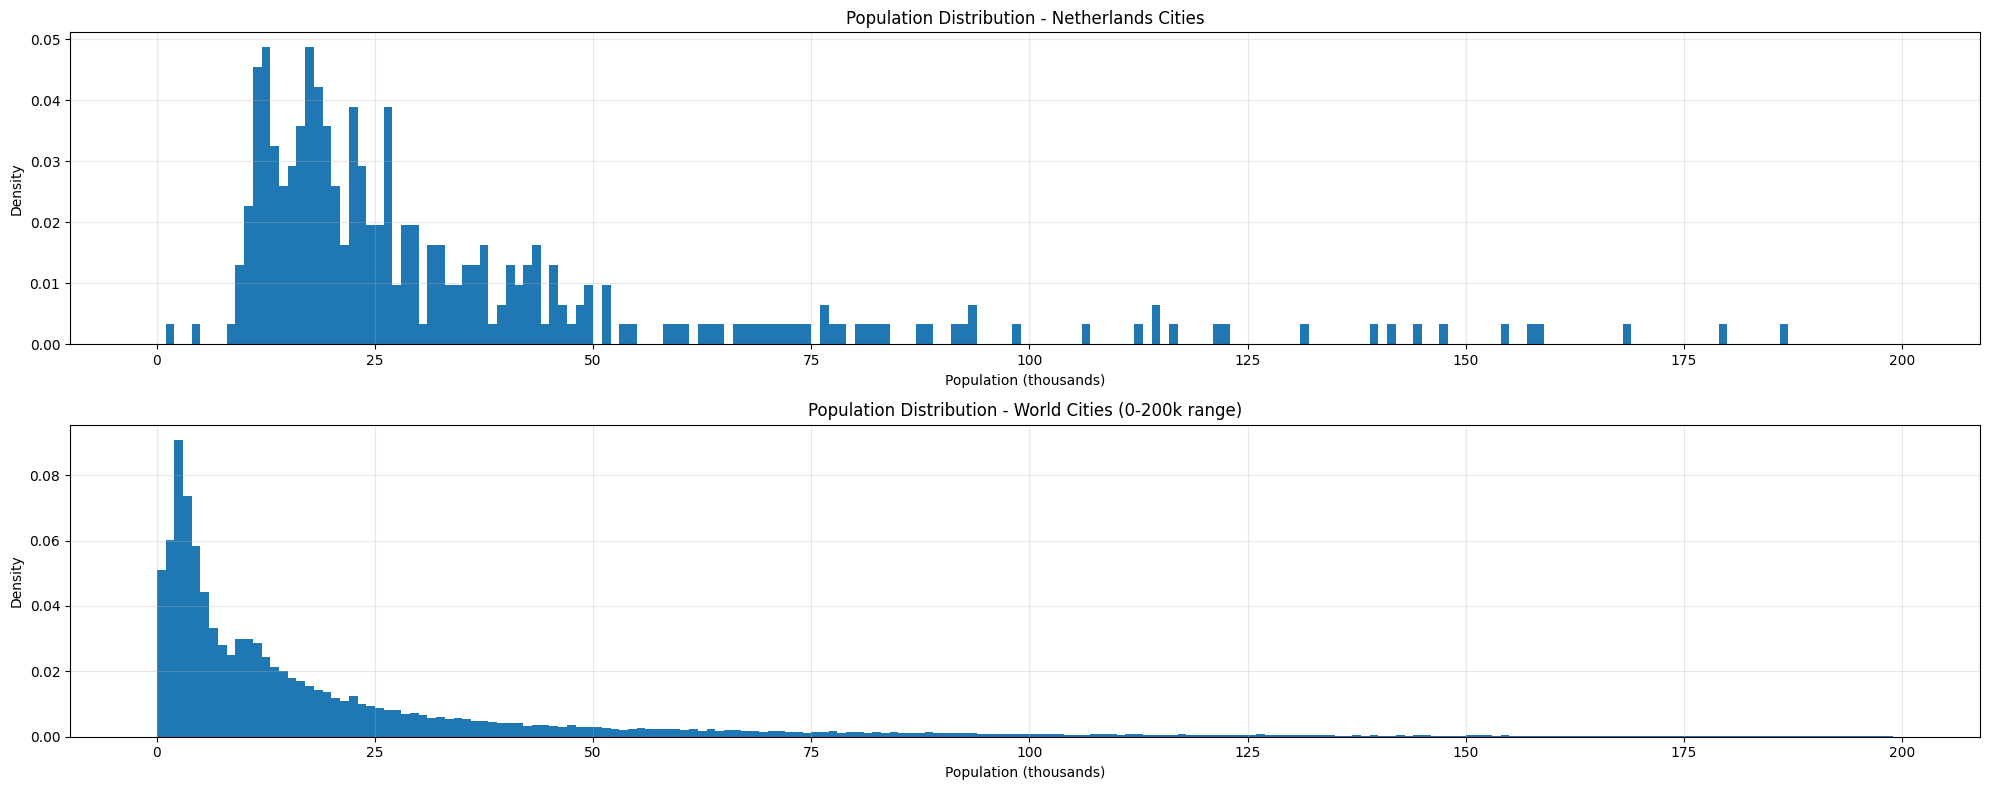

In [17]:
plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), bins=np.arange(0, 200, 1), density=1);

# Add the subplot of the world cities below this Dutch one
## Your code and explanation in comments...
# Labeling the first subplot for Dutch cities
plt.xlabel('Population (thousands)')
plt.ylabel('Density')
plt.title('Population Distribution - Netherlands Cities')
plt.grid(True, alpha=0.3)

# Now I'm creating the second subplot for world cities
plt.subplot(2,1,2);
# I need to clean the world data first
world_cities_clean = cities.dropna(subset=['Population'])
# Creating histogram for all world cities in the same range
plt.hist(np.asarray(world_cities_clean.Population/1000), bins=np.arange(0, 200, 1), density=1);
plt.xlabel('Population (thousands)')
plt.ylabel('Density')
plt.title('Population Distribution - World Cities (0-200k range)')
plt.grid(True, alpha=0.3)
# Making sure both plots fit nicely together
plt.tight_layout()
# Comparing these two plots, I can see the world has way more variation in city sizes
# The Netherlands seems to have mostly smaller cities compared to the global distribution


## Assignment 1e

Write what conclusions you can deduce from the above plots?

In [18]:
# From all these plots, here's what I learned:

# 1. Global cities aren't spread evenly - they cluster in populated areas
# Most cities are in Europe, Asia, and North America where lots of people live

# 2. Netherlands vs the world:
# - Dutch cities are generally smaller than what I see globally
# - Most Dutch cities have less than 50,000 people
# - The world has some massive cities that dwarf anything in the Netherlands

# 3. About Dutch cities specifically:
# - Amsterdam is clearly the biggest city
# - Most cities are concentrated in the western part (the Randstad area)
# - There are lots of small cities but only a few really big ones

*week 2 exercise - part 2*

# Data visualization: Two additional Chart Types for Exploring

This assignment first shows two useful chart types: parallel coordinates and scatter matrix. You will practice these plots using a new dataset.

## Parallel Coordinates with Pandas

First, we import the required libraries, using standard conventions. For the example of parallel coordinates we shall use the famous iris data set, describing the sepal and petal dimensions for three types of irises.

In [19]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', low_memory=False, encoding = 'ISO-8859-1', header=None)
iris.columns = ['sepal width','sepal length','petal width','petal length', 'name']

iris.head()

,sepal width,sepal length,petal width,petal length,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we do not use matplotlib directly but use a plot function of the pandas library that uses matplotlib in the background. In this case we create a parallel coordinates plot.

Pandas has many plotting function as can be seen here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

The parallel coordinates plot can give insight into a dataset with a large number of features. For the iris set there are four features (petal width, petal length, sepal width, sepal length).

While you can make a scatter plot with 4 features using x,y,color and size; a parallel coordinates plot is usually easier to understand once you know how to read it. Here would be the scatter plot:

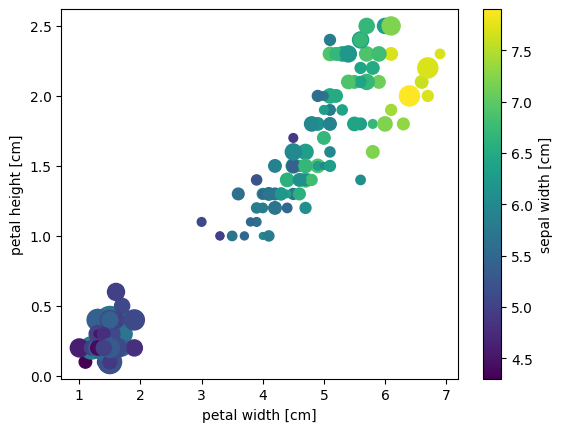

In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(iris['petal width'], iris['petal length'], c=iris['sepal width'], s=iris['sepal length']**4)
plt.xlabel('petal width [cm]')
plt.ylabel('petal height [cm]')
plt.colorbar(label='sepal width [cm]');

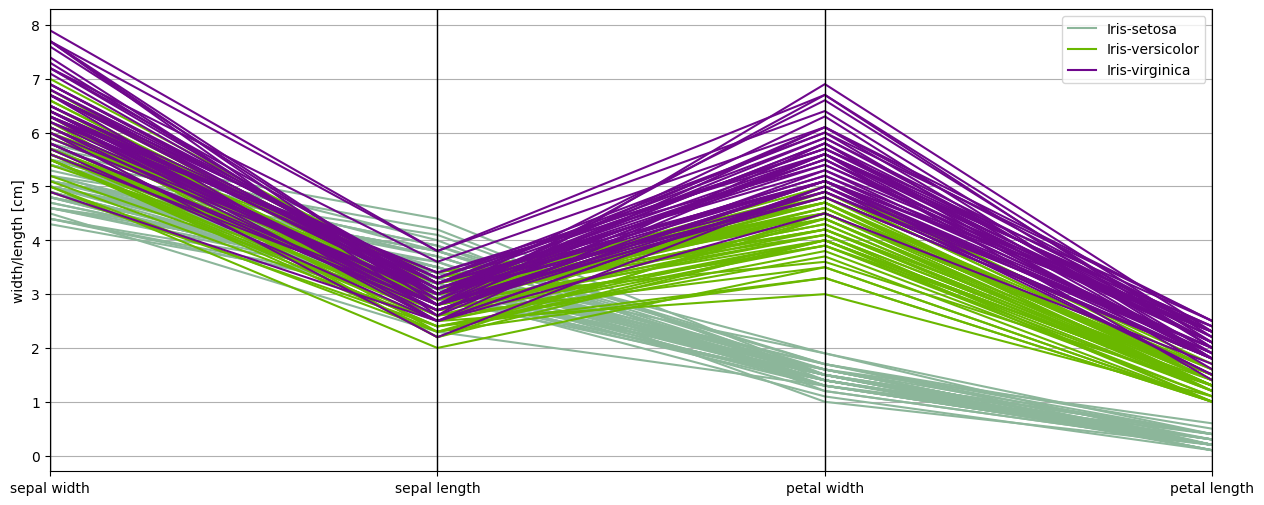

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(iris,'name')
ax.set_ylabel('width/length [cm]');

## Scatter Matrix with Pandas

A scatter matrix is a chart that gives you an overview of the correlations between any number of feaures.

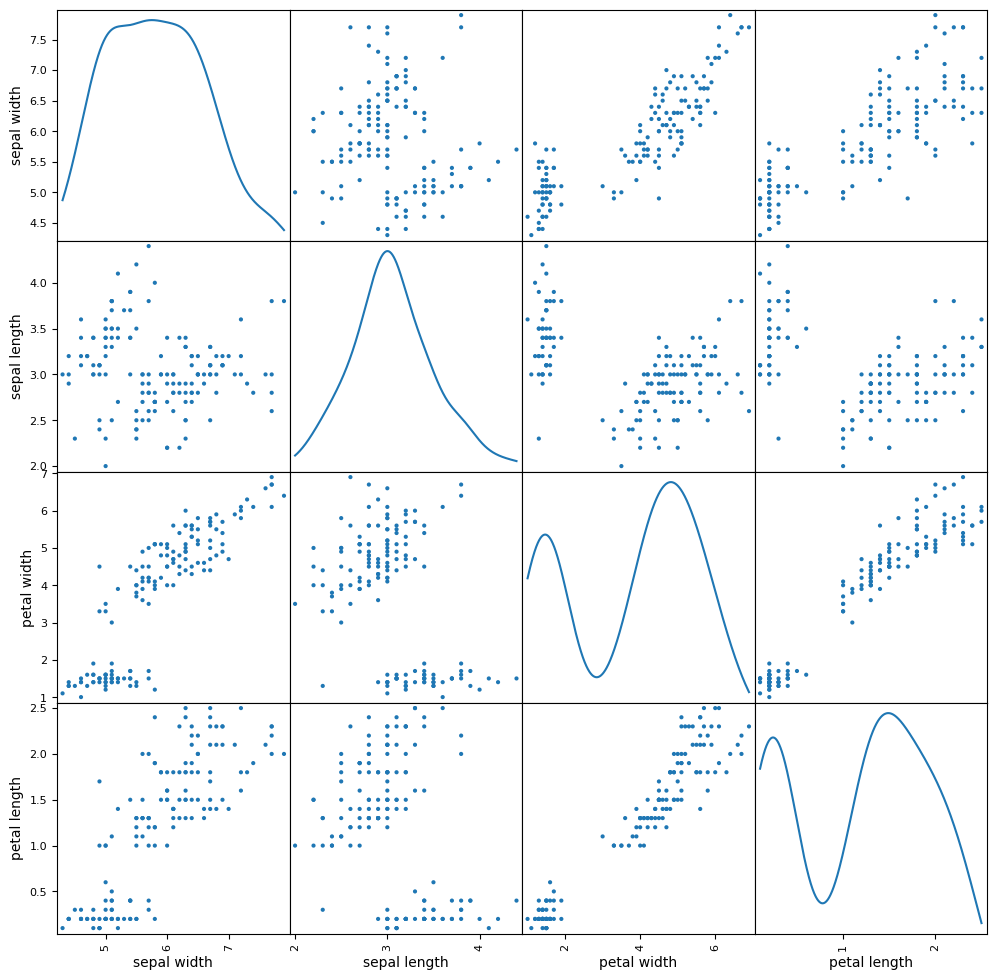

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=1, figsize=(12, 12), diagonal='kde');

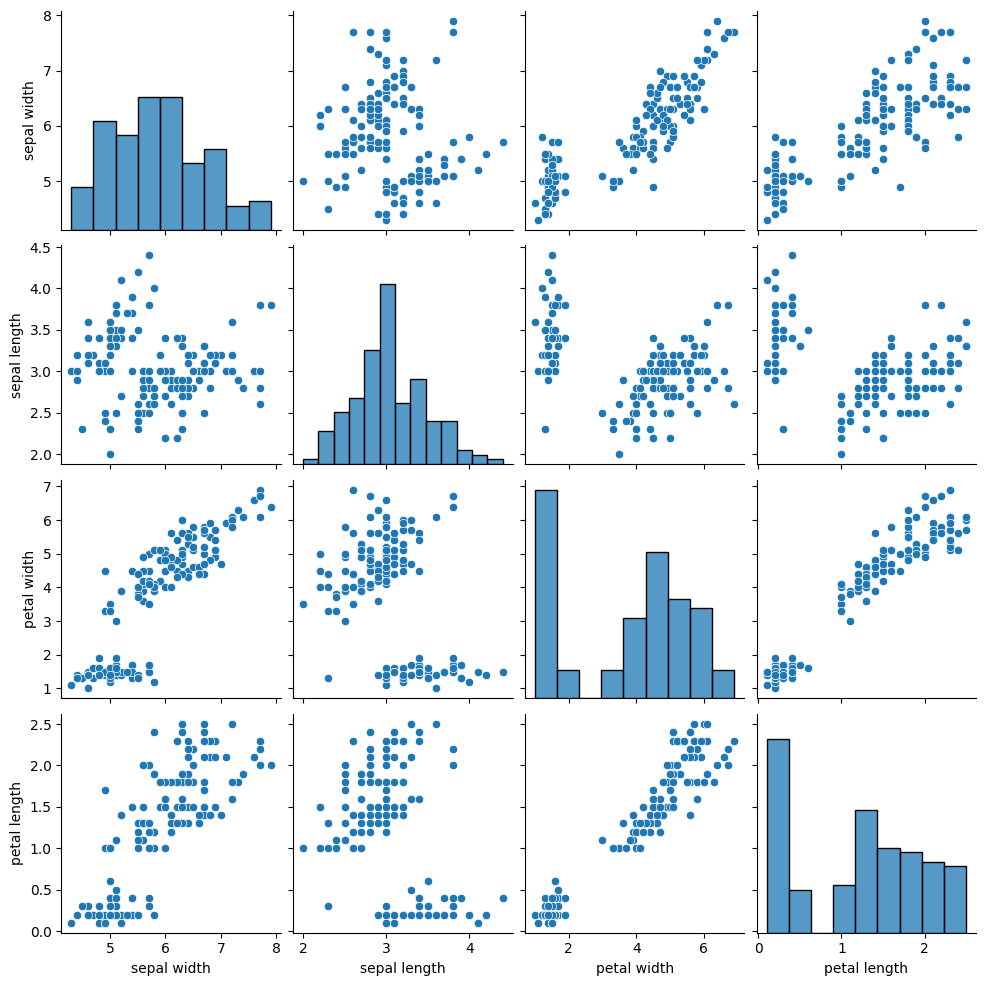

In [23]:
# or see what happens if we use the Seaborn library...
import seaborn as sns
sns.pairplot(iris)

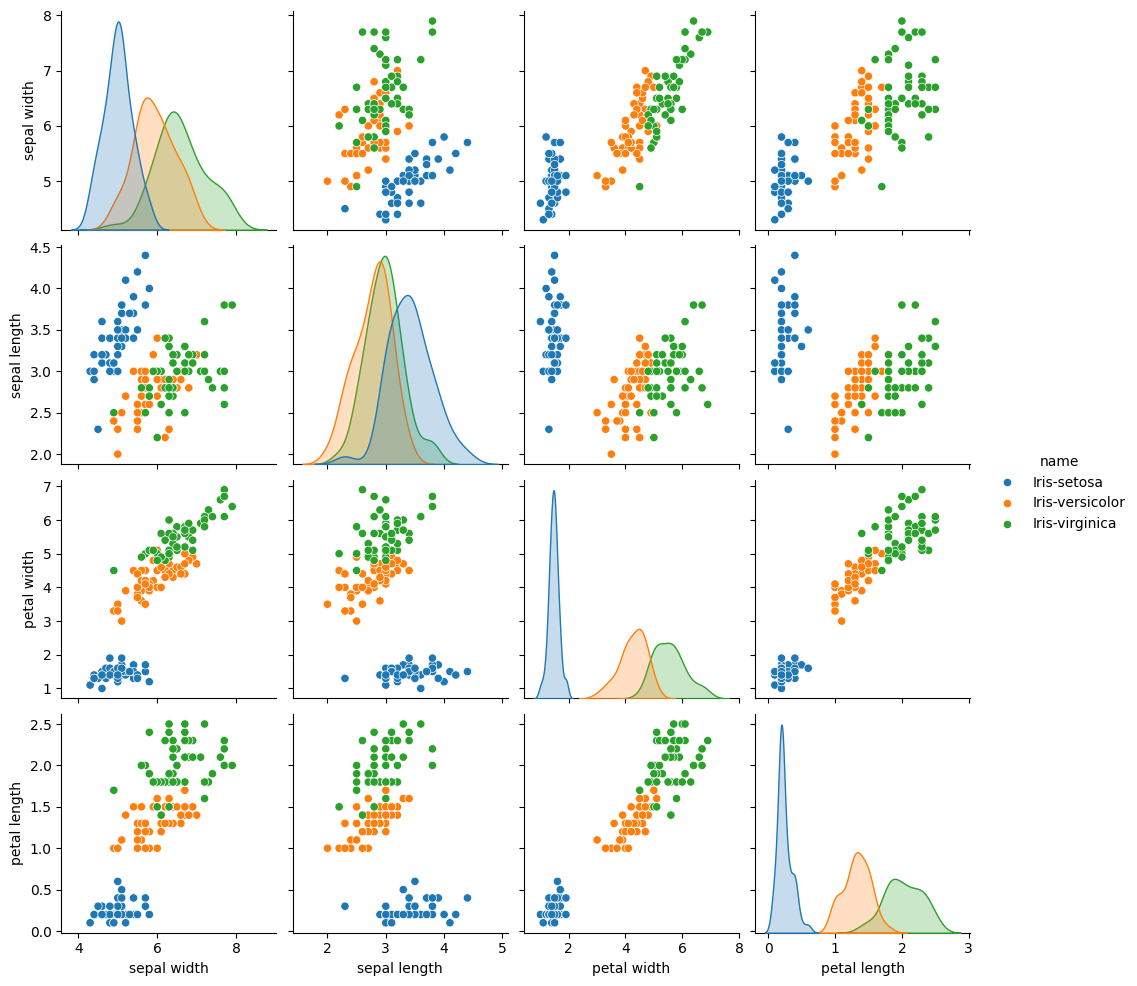

In [24]:
# Seaborn provides some simples ways to explore the data and correlations in more (visual) detail...
import seaborn as sns
sns.pairplot(iris, hue="name")

## Assignment
Now try to create similar plots for a new dataset about car features.

In [25]:
# The data file is quite nasty with several different delimeters that read_csv cannot handle very well
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name','j','k','l','m','n']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", names=names, header=None, engine='python')
# Create a subset of dataset with all useful features
cars.info()

cars = cars.iloc[:,[0,1,2,4,5,6,7]]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   j             396 non-null    object 
 10  k             197 non-null    object 
 11  l             45 non-null     object 
 12  m             3 non-null      object 
 13  n             1 non-null      object 
dtypes: float64(4), int64(3), object(7)
memory usage: 43.7+ KB


# Create a normalized dataset
using Mean normalization (see: https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization)

In [26]:
cars_norm = cars # extenid this code to create a normalized set
cars_norm = (cars-cars.mn())/(cars.max()-cars.min())
cars_norm.head(100)

AttributeError: 'DataFrame' object has no attribute 'mn'

Next, create a parallel coordinates plot. What happens when you do not use the normalized data?

In [ ]:
cars.head(100)
from pandas.plotting import parallel_coordinates
cars_with_year = cars_norm.copy()
cars_with_year['year_group'] = cars['model year'].apply(lambda x: '70s' if x < 80 else '80s')

plt.figure(figsize=[15,6])
parallel_coordinates(cars_with_year.drop('model year', axis=1), 'year_group', alpha=0.3)
plt.ylabel('Normalized Values')
plt.title('Parallel Coordinates Plot - Car Features (Normalized)')
plt.xticks(rotation=45)
plt.tight_layout()


# If I didn't normalize the data, weight would dominate everything because it's so much bigger
# than other numbers, making it impossible to see patterns in other features


Answer this question: What conclusions can you make from the relation between weight and acceleration? If you don't understand how to interpret parallel coordinates plots, read: https://eagereyes.org/techniques/parallel-coordinates.


In [ ]:
## Answer here in Markdown
# Looking at weight and acceleration in the parallel coordinates:
# I can see they have an opposite relationship - when weight goes up, acceleration goes down
# This makes total sense because heavier cars are slower to accelerate


Next, try to highlight the model years >= 80. 

Hints: 
* you can slice your data with ```cars_norm[cars['model year']>=80]```.
* you can plot both all data and the sliced data on top of each other with different colors  

In [ ]:
## Create the parallel coordinates plot here
fig = plt.figure(figsize=[15,6])
# I want to highlight the newer cars (1980+) to see how they're different
parallel_coordinates(cars_with_year.drop('model year', axis=1), 'year_group', 
                    colors=['lightgray', 'red'], alpha=0.6)
plt.ylabel('Normalized Values')
plt.title('Parallel Coordinates - Highlighting Cars from 1980-1982 (Red)')
plt.xticks(rotation=45)
plt.tight_layout()

Answer this question: what conclusions can you draw from cars with model years 80-82?

In [ ]:
## Answers here in Markdown
# Cars from 1980-1982 (the red lines) show some clear patterns:
# - They get better gas mileage (mpg is higher)
# - They're lighter weight
# - They accelerate better even though they're smaller
# This probably happened because of the oil crisis - people wanted efficient cars

Now, create a scatter matrix for the car data. 
Do we need to use the normalized data?
Are we looking for a dataset that we can easily cluster or will we get more luck looking for trends?

In [ ]:
## Create the scatter matrix here
plt.figure(figsize=(12, 10))
scatter_matrix(cars, alpha=0.6, figsize=(12, 10), diagonal='hist')
plt.suptitle('Scatter Matrix - Car Features', y=0.95)
plt.tight_layout()

# For scatter matrix I don't need normalized data because each little plot shows 
# the relationship between just two features with their real values
# This is better for seeing actual correlations

*What are your final conclusions looking at the (visual) results? What did you learn about the data and dataset? Or what new questions did you derive from the plots you've made?*

In [ ]:
# My final conclusions:
# 1. Cars definitely got better over time - the early 1980s cars were more efficient
# 2. There are clear relationships: heavier cars use more gas and accelerate slower
# 3. This data is better for seeing trends over time rather than grouping cars into categories
# 4. New questions I have: Do European and Japanese cars follow the same patterns as American cars?
# How much further did this efficiency trend continue after 1982?